## PART 2  : FEATURE ENGINEERING AND SELECTION

#IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re as re
from datetime import datetime

But first,we need to import our clean dataframe from the previous notebook.

When we try to think of features that will predict an Install, we are doing feature engineering. We may not end up using all the features we create, but it is an important extension of exploratory analysis. The key difference between feature engineering and exploratory analysis is that we now have a defined question in mind: "What drives a potential customer to purchase your app?"

We will also be making decisions about our final set of features along the way. Too few features results in low predictive power, and too many features may violate the assumption that there is no multicollinearity present. Carefully choosing what features you think will be powerful enough to predict your outcome feature is difficult, and is subject to data availability and integrity problems. In short, it deserves your thoughtful consideration!

You should always make these preliminary checks in any feature you create to make sure it is what you expect!

How do you get started with feature engineering and selection? Machines still need us! Our understanding or the world and intuition about cause and effect allow us to extract meaning from raw data and structure data in a more powerful way.

Feature engineering is a very creative process so start by asking yourself: What would motivate a potential customer to download your app?** What comes to mind? Probably the most obvious response is the use case you have in mind. Dig deeper, what is that use case driven by:

1) the size. how big is your app?.An install is more likely to happen if your app is relatively smaller in size.

2) the Price. Maybe your app is too expensive for potential customers to download.

3) Last Updated Is your app regularly updated to include new features the customers want?Is your app outdated?

4) Minimum Version How many versions does your app have? Are they taken down as soon as a new version is introduced or is it still made available to your customers?Could they revert back to an older version if a newer version doesn't seem to be working for them?

5) Reviews How many reviews does your app have? The more the reviews the high chance you stand of your app being downloaded?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
APPSDF = pd.read_csv('APPSDF.csv')
APPSDF

,Unnamed: 0,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Last_Updated_Days,Version_begin,Version_end
0,0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548562,305034.0,5000000,NaN,0.00,1,2019-03-29,Varies with device,Varies with device,251,Varies with device,Varies with device
1,1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671,1207922.0,100000000,NaN,0.00,1,2019-03-29,Varies with device,Varies with device,251,Varies with device,Varies with device
2,2,Peapod,SHOPPING,3.656329,1967.0,100000,1400000.0,0.00,1,2018-09-20,5.0 and up,2.2,441,5.0,up
3,3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,389154.0,10000000,16000000.0,0.00,1,2019-03-22,4.2 and up,4.1,258,4.2,up
4,4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752,2291.0,10000,NaN,5.99,1,2019-04-01,Varies with device,Varies with device,248,Varies with device,Varies with device
5,5,Safeway Online Shopping,FOOD_AND_DRINK,3.825322,2559.0,100000,23000000.0,0.00,1,2019-03-29,5.0 and up,7.6,251,5.0,up
6,6,"Yelp: Food, Shopping, Services Nearby",TRAVEL_AND_LOCAL,4.267268,421918.0,10000000,NaN,0.00,2,2019-03-28,Varies with device,Varies with device,252,Varies with device,Varies with device
7,7,Talabat: Food Delivery,FOOD_AND_DRINK,4.495085,142618.0,5000000,NaN,0.00,1,2019-03-31,Varies with device,Varies with device,249,Varies with device,Varies with device
8,8,Fast Food Locator | Worldwide Fast Food Finder,TRAVEL_AND_LOCAL,3.811765,85.0,10000,4100000.0,0.00,1,2019-02-10,4.3 and up,2.4,298,4.3,up
9,9,Allrecipes Dinner Spinner,FOOD_AND_DRINK,4.545353,67514.0,5000000,NaN,0.00,1,2019-03-07,Varies with device,Varies with device,273,Varies with device,Varies with device


In [3]:
APPSDF.isnull().sum()

Unnamed: 0              0
App Name                0
Category                0
Rating                  0
Reviews                 0
Installs                0
Size                 3207
Price                   0
Content Rating          0
Last Updated            0
Minimum Version         0
Latest Version        345
Last_Updated_Days       0
Version_begin           0
Version_end             0
dtype: int64

In [13]:
APPSDF['Size']=APPSDF['Size'].fillna(APPSDF['Size'].mean())

In [14]:
APPSDF['Size'].isnull().sum()

0

In [17]:
APPSDF['Latest Version']=APPSDF['Latest Version'].fillna('NaN')

In [18]:
APPSDF['Latest Version'].isnull().sum()

0

Text(0.5,1,'Price')

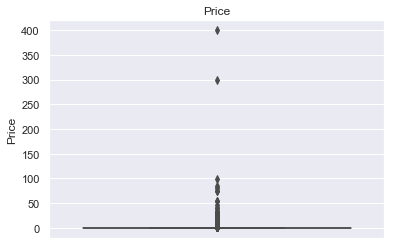

In [20]:
#Boxplot showing the price outliers
sns.boxplot(y=APPSDF['Price'])
plt.title('Price')

Text(0.5,1,'Reviews')

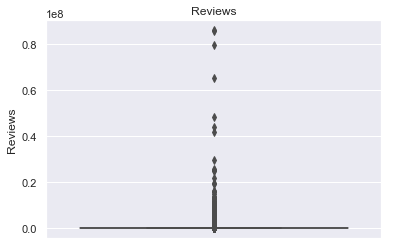

In [21]:
sns.boxplot(y=APPSDF['Reviews'])
plt.title('Reviews')

In [22]:
APPSDF['Reviews'].describe()

count    3.199700e+04
mean     9.849703e+04
std      1.173748e+06
min      1.000000e+00
25%      1.390000e+02
50%      1.463000e+03
75%      1.444900e+04
max      8.621429e+07
Name: Reviews, dtype: float64

In [23]:
#Filtering the Variables containing outliers in the Dataframe
Q1 = APPSDF['Price'].quantile(0.25)
Q3 = APPSDF['Price'].quantile(0.75)
IQR = Q3 - Q1

filter = (APPSDF['Price'] >= Q1 - 1.5 * IQR) & (APPSDF['Price'] <= Q3 + 1.5 *IQR)

In [24]:
#Renaming the Price Dataframe
APPSDF['Price']=APPSDF['Price'].loc[filter]

0        0.0
1        0.0
2        0.0
3        0.0
4        NaN
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
31967    0.0
31968    0.0
31969    0.0
31970    0.0
31971    0.0
31972    0.0
31973    0.0
31974    0.0
31975    0.0
31976    0.0
31977    0.0
31978    0.0
31979    0.0
31980    0.0
31981    0.0
31982    0.0
31983    0.0
31984    0.0
31985    0.0
31986    0.0
31987    0.0
31988    0.0
31989    0.0
31990    NaN
31991    0.0
31992    0.0
31993    0.0
31994    0.0
31995    0.0
31996    0.0
Name: Price, Length: 31997, dtype: float64

In [25]:
#Filtering the Variables containing outliers in the Dataframe
Q1 = APPSDF['Installs'].quantile(0.25)
Q3 = APPSDF['Installs'].quantile(0.75)
IQR = Q3 - Q1

filter = (APPSDF['Installs'] >= Q1 - 1.5 * IQR) & (APPSDF['Installs'] <= Q3 + 1.5 *IQR)

In [26]:
APPSDF['Installs']=APPSDF['Installs'].loc[filter]

In [27]:
## Checking for linearity in the columns

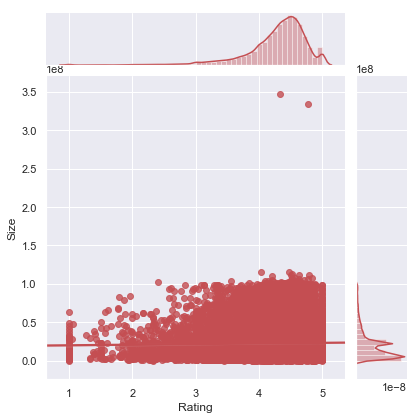

In [28]:
sns.set(style='darkgrid') 
sns.set_color_codes() 
sns.jointplot(data=APPSDF,x="Rating", y="Size", color="r",kind="reg")

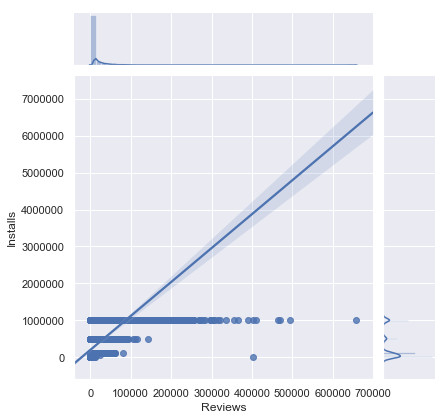

In [29]:
sns.jointplot(data=APPSDF,x="Reviews", y="Installs", color="b",kind="reg")

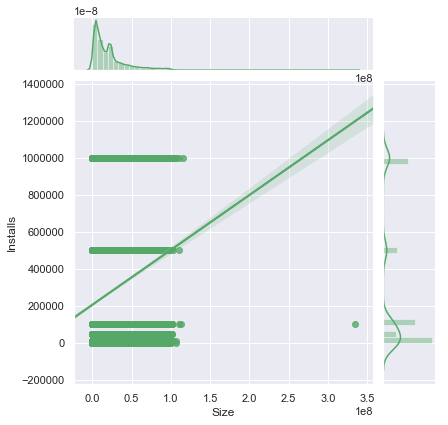

In [30]:
sns.jointplot(data=APPSDF,x="Size", y="Installs", color="g",kind="reg")

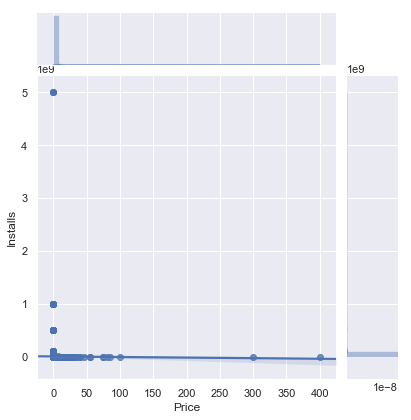

In [8]:
sns.jointplot(data=APPSDF,x="Price", y="Installs", color="b",kind="reg")

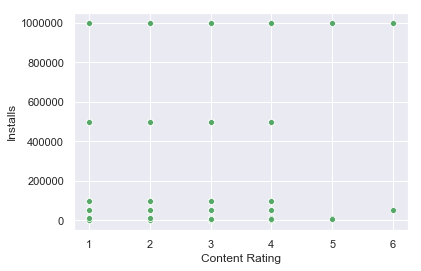

In [31]:
sns.scatterplot(data=APPSDF,x="Content Rating", y="Installs", color="g")

In [33]:
export_csv = APPSDF.to_csv (r'C:\Users\Tasha PC\Documents\Data Science\google-playstore-apps\APPSDF1.csv')